In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV data
train_data = pd.read_csv('/kaggle/input/virusmnist/train.csv')  # Adjust the path to your train CSV file
train_data = train_data.iloc[:, :-1]  # This removes the last column
test_data = pd.read_csv('/kaggle/input/virusmnist/test.csv')  # Adjust the path to your test CSV file
test_data = test_data.iloc[:, :-1]  # This removes the last column

print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

# Prepare the training data
X_train = train_data.iloc[:, 1:].values.reshape(-1, 32, 32, 1)  # Correct shape
y_train = to_categorical(train_data.iloc[:, 0].values, num_classes=10)

# Prepare the test data
# Prepare the test data
X_train = train_data.iloc[:, 1:].values.reshape(-1, 32, 32, 1)  # Correct shape
X_test = test_data.iloc[:, 1:].values.reshape(-1, 32, 32, 1)    # Correct shape



# Resize images to 32x32 and convert to 3 channels (RGB)
X_train_resized = np.array([tf.image.resize(image, (32, 32)).numpy() for image in X_train])
X_train_rgb = np.repeat(X_train_resized, 3, axis=-1)

X_test_resized = np.array([tf.image.resize(image, (32, 32)).numpy() for image in X_test])
X_test_rgb = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-built VGG16 model without the top layers
# Load pre-built VGG16 model without the top layers
base_model = VGG16(weights='imagenet',  # Use 'imagenet' if file path is not available
                   include_top=False, 
                   input_shape=(32, 32, 3))


# Add custom layers on top
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_rgb, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict on test set
y_test_pred = model.predict(X_test_rgb)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Print model summary (trainable and non-trainable parameters)
print("\nModel Summary:")
model.summary()



Train data shape: (48422, 1025)
Test data shape: (3458, 1025)
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


I0000 00:00:1725787622.047906     103 service.cc:145] XLA service 0x7dffa0003a20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725787622.048007     103 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1725787622.048013     103 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


   5/1211 ━━━━━━━━━━━━━━━━━━━━ 38s 32ms/step - accuracy: 0.0831 - loss: 53.1542      

I0000 00:00:1725787628.571441     103 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1211/1211 ━━━━━━━━━━━━━━━━━━━━ 56s 38ms/step - accuracy: 0.5147 - loss: 2.8868 - val_accuracy: 0.7983 - val_loss: 0.6240
Epoch 2/10
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.8225 - loss: 0.5625 - val_accuracy: 0.8743 - val_loss: 0.4223
Epoch 3/10
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.8362 - loss: 0.5351 - val_accuracy: 0.8659 - val_loss: 0.4213
Epoch 4/10
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.8755 - loss: 0.3980 - val_accuracy: 0.8626 - val_loss: 0.4456
Epoch 5/10
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.8668 - loss: 0.4351 - val_accuracy: 0.8771 - val_loss: 0.3741
Epoch 6/10
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.8824 - loss: 0.3583 - val_accuracy: 0.8820 - val_loss: 0.3760
Epoch 7/10
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.8886 - loss: 0.3489 - val_accuracy: 0.8833 - val_loss: 0.3611
Epoch 8/10
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.8899 - loss: 0.34

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,545,760 (169.93 MB)

 Trainable params: 14,848,586 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,697,174 (113.29 MB)

In [2]:
# # Calculate metrics
# accuracy = accuracy_score(test_data.iloc[:, 0], y_test_pred_classes)
# precision = precision_score(test_data.iloc[:, 0], y_test_pred_classes, average='weighted')
# recall = recall_score(test_data.iloc[:, 0], y_test_pred_classes, average='weighted')
# f1 = f1_score(test_data.iloc[:, 0], y_test_pred_classes, average='weighted')

# # Create confusion matrix
# cm = confusion_matrix(test_data.iloc[:, 0], y_test_pred_classes)

# # Plot confusion matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

# # Print results
# print(f"Accuracy Score: {accuracy:.4f}")
# print(f"Precision Score: {precision:.4f}")
# print(f"Recall Score: {recall:.4f}")
# print(f"F1 Score: {f1:.4f}")

# print("\nConfusion Matrix:")
# print(cm)
# # Calculate metrics
# test_accuracy = accuracy_score(y_test_true, y_test_pred)
# test_precision = precision_score(y_test_true, y_test_pred, average='weighted')
# test_recall = recall_score(y_test_true, y_test_pred, average='weighted')
# test_f1 = f1_score(y_test_true, y_test_pred, average='weighted')

# # Print Confusion Matrix for Test Set
# print("Confusion Matrix for Test Set:")
# print(confusion_matrix(y_test_true, y_test_pred))

# # Display Summary of Results
# print("\nMetrics for Test Set:")
# print(f"Accuracy: {test_accuracy:.4f}")
# print(f"Precision: {test_precision:.4f}")
# print(f"Recall: {test_recall:.4f}")
# print(f"F1 Score: {test_f1:.4f}")

# print("\nSummary of Results:")
# print(f"{'Set':<10}{'Accuracy':<10}{'Precision':<10}{'Recall':<10}{'F1 Score':<10}")
# print("--------------------------------------------------")

# print(f"{'Test':<10}{test_accuracy:.4f}{test_precision:.4f}{test_recall:.4f}{test_f1:.4f}")


In [3]:
# # Import necessary libraries
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# # Print model summary (trainable and non-trainable parameters)
# print("\nModel Summary:")
# model.summary()

# # Training Metrics
# print("Training Metrics:")
# # Calculate metrics
# accuracy_train = accuracy_score(train_data.iloc[:, 0], y_train_pred_classes)
# precision_train = precision_score(train_data.iloc[:, 0], y_train_pred_classes, average='weighted')
# recall_train = recall_score(train_data.iloc[:, 0], y_train_pred_classes, average='weighted')
# f1_train = f1_score(train_data.iloc[:, 0], y_train_pred_classes, average='weighted')

# # Create confusion matrix
# cm_train = confusion_matrix(train_data.iloc[:, 0], y_train_pred_classes)

# # Plot confusion matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix - Training Data')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

# # Print results
# print(f"Accuracy Score: {accuracy_train:.4f}")
# print(f"Precision Score: {precision_train:.4f}")
# print(f"Recall Score: {recall_train:.4f}")
# print(f"F1 Score: {f1_train:.4f}")
# print("\nConfusion Matrix:")
# print(cm_train)

# # Testing Metrics
# print("\nTesting Metrics:")
# # Calculate metrics
# accuracy_test = accuracy_score(test_data.iloc[:, 0], y_test_pred_classes)
# precision_test = precision_score(test_data.iloc[:, 0], y_test_pred_classes, average='weighted')
# recall_test = recall_score(test_data.iloc[:, 0], y_test_pred_classes, average='weighted')
# f1_test = f1_score(test_data.iloc[:, 0], y_test_pred_classes, average='weighted')

# # Create confusion matrix
# cm_test = confusion_matrix(test_data.iloc[:, 0], y_test_pred_classes)

# # Plot confusion matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix - Testing Data')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

# # Print results
# print(f"Accuracy Score: {accuracy_test:.4f}")
# print(f"Precision Score: {precision_test:.4f}")
# print(f"Recall Score: {recall_test:.4f}")
# print(f"F1 Score: {f1_test:.4f}")
# print("\nConfusion Matrix:")
# print(cm_test)



Model Summary:


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,545,760 (169.93 MB)

 Trainable params: 14,848,586 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,697,174 (113.29 MB)

Test Accuracy: 0.8826
Test Precision: 0.8696
Test Recall: 0.8826
Test F1 Score: 0.8654


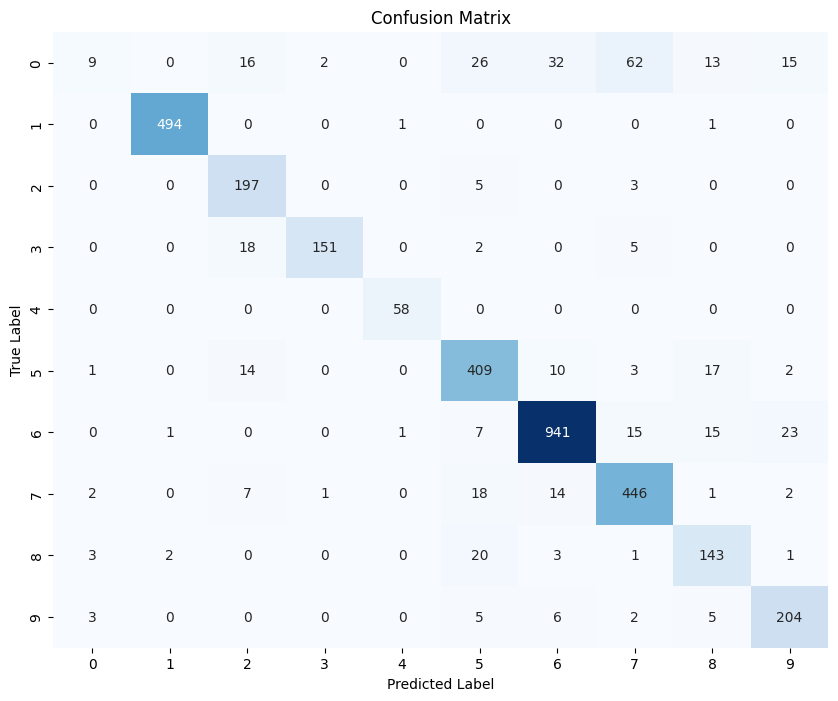

In [4]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Print model summary (trainable and non-trainable parameters)
print("\nModel Summary:")
model.summary()

# Convert y_test to categorical labels for evaluation metrics
y_test = test_data.iloc[:, 0].values

# Calculate accuracy score
test_accuracy = accuracy_score(y_test, y_test_pred_classes)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Calculate precision score
test_precision = precision_score(y_test, y_test_pred_classes, average='weighted')
print(f"Test Precision: {test_precision:.4f}")

# Calculate recall score
test_recall = recall_score(y_test, y_test_pred_classes, average='weighted')
print(f"Test Recall: {test_recall:.4f}")

# Calculate F1 score
test_f1 = f1_score(y_test, y_test_pred_classes, average='weighted')
print(f"Test F1 Score: {test_f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
